# Install Tools

In [69]:
#Run this line then restart the runtime environment to use the new version for using R in python
pip install -Iv rpy2==3.4.2
pip install pandas==1.5.3

Using pip 25.0.1 from /home/lamsade/hbraikia/BBI/venv/lib/python3.11/site-packages/pip (python 3.11)
  Using cached rpy2-3.4.2-py3-none-any.whl
  Obtaining dependency information for cffi>=1.10.0 from https://files.pythonhosted.org/packages/ff/6b/d45873c5e0242196f042d555526f92aa9e0c32355a1be1ff8c27f077fd37/cffi-1.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached cffi-1.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Obtaining dependency information for jinja2 from https://files.pythonhosted.org/packages/62/a1/3d680cbfd5f4b8f15abc1d571870c5fc3e594bb582bc3b64ea099db13e56/jinja2-3.1.6-py3-none-any.whl.metadata
  Obtaining dependency information for pytz from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzlocal from https://files.pythonhosted.org/packages/c2/14/e2a54fabd4f08cd

In [6]:
rpy2.robjects.r('''
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("edgeR")
        ''')

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.2 Patched (2022-11-10
  r83330)

R[write to console]: Bioconductor version '3.16' is out-of-date; the current release version '3.20'
  is available with R version '4.4'; see https://bioconductor.org/install

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.2 Patched (2022-11-10
  r83330)

R[write to console]: Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, foreign, KernSmooth, lattice, mgcv, nlme,
    nnet, rpart, spatial

R[write to console]: Old packages: 'askpass', 'BH', 'bit', 'bit64', 'bitops', 'cli', 'commonmark',
  'cpp11', 'curl', 'fs', 'future', 'ggplot2', 'globals', 'glue', '

Update all/some/none? [a/s/n]: 

 n


'edgeR'


# Imports

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

from src.data_preprocessing import DataPreprocessing
from src.diversity import DiversityAnalysis
from src.modeling import ModelTrainer
from src.multivariates_analysis import MultivariatesAnalysis
from src.SVD import SVD

# Import Data

In [2]:
# Initialize the preprocessing class
preproc = DataPreprocessing()

In [3]:
# Load OTU table
otu_v1v2 = preproc.import_data("../Data/OTUtable_euksV1V2.txt")
otu_v3v4 = preproc.import_data("../Data/OTUtable_bactV3V4_filtered.txt")
otu_v4 = preproc.import_data("../Data/OTUtable_euksV4.txt")
otu_37F = preproc.import_data("../Data/OTUtable_foram37F.txt")

otu_v1v2

,OTU_ID,Total_Abund_Otu,FHF1-St1-Gr1-A,FHF1-St1-Gr1-B,FHF1-St1-Gr1-C,FHF1-St1-Gr2-A,FHF1-St1-Gr2-B,FHF1-St1-Gr2-C,FHF1-St2-Gr1-A,FHF1-St2-Gr1-B,...,FHF5-St4-Gr2-B,FHF5-St4-Gr2-C,FHF5-St5-Gr1-A,FHF5-St5-Gr1-B,FHF5-St5-Gr1-C,FHF5-St5-Gr2-A,FHF5-St5-Gr2-B,FHF5-St5-Gr2-C,Taxa,Unnamed: 147
0,OTU0,4527303,110226,107877,58167,22,47797,75184,180851,68868,...,864,889,120,9,79,64,108,19,Eukaryota;SAR;Stramenopiles;Ochrophyta;Diatome...,NaN
1,OTU1,1298733,250,14,29,1,1,3,27,78,...,818,3401,467,151,140,196,363,82,Eukaryota;Opisthokonta;Holozoa;Metazoa;Eumetaz...,NaN
2,OTU2,898583,955,380,59,1,90,62,326,196,...,308,262,94,39,281,135,182,38,Eukaryota;Opisthokonta;Holozoa;Metazoa;Eumetaz...,NaN
3,OTU3,452816,442,892,368,0,121,240,55,75,...,1,2,0,1,0,41,0,0,Unassigned,NaN
4,OTU4,485850,8,1,4,0,33,29,54,44,...,5675,4456,657,86,422,338,524,56,Unassigned,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941370,OTU941370,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Eukaryota;Opisthokonta;Holozoa;Metazoa;Eumetaz...,NaN
941371,OTU941371,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Unassigned,NaN
941372,OTU941372,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Eukaryota;SAR;Stramenopiles;Ochrophyta;Diatome...,NaN
941373,OTU941373,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Eukaryota;Opisthokonta;Holozoa;Metazoa;Eumetaz...,NaN


In [4]:
# Since the V9 OTU file is very large, we filter it to reduce size
v9_data_file = dd.read_csv("../Data/OTUtable_euksV9.txt", delimiter = '\t', decimal=',')
total_col_v9 = [m for m in v9_data_file if "Total_" in m] #Find Otus Total Abund column
v9_data_file = v9_data_file[v9_data_file[total_col_v9[0]] > 1000]

In [5]:
# Load metadata
metadata = preproc.import_data("../Data/metadata.txt")
metadata

,col_plot,samples_names,Locality,Station,Grab,Distance_cage_gps,Depth,pH,AMBI,NSI,ISI,NQI1
0,1,FHF1-St1-Gr1-A,Bjørnsvik,1,1,0,206,7.2,4.447143,13.434185,5.941429,0.401123
1,1,FHF1-St1-Gr1-B,Bjørnsvik,1,1,0,206,7.2,4.447143,13.434185,5.941429,0.401123
2,1,FHF1-St1-Gr1-C,Bjørnsvik,1,1,0,206,7.2,4.447143,13.434185,5.941429,0.401123
3,1,FHF1-St1-Gr2-A,Bjørnsvik,1,3,0,206,7.2,4.527226,12.156156,6.138889,0.411114
4,1,FHF1-St1-Gr2-B,Bjørnsvik,1,3,0,206,7.2,4.527226,12.156156,6.138889,0.411114
...,...,...,...,...,...,...,...,...,...,...,...,...
139,5,FHF5-St5-Gr1-B,Aukrasanden,5,1,1530,168,7.7,1.301270,27.229417,9.946458,0.840299
140,5,FHF5-St5-Gr1-C,Aukrasanden,5,1,1530,168,7.7,1.301270,27.229417,9.946458,0.840299
141,5,FHF5-St5-Gr2-A,Aukrasanden,5,2,1530,168,7.7,1.389163,25.815230,10.006346,0.860640
142,5,FHF5-St5-Gr2-B,Aukrasanden,5,2,1530,168,7.7,1.389163,25.815230,10.006346,0.860640


# Data Preprocessing

In [6]:
# Set filtering thresholds
filter_R = 10000  
filter_C = 100   

# Apply filtering and full preprocessing pipeline (filtering, TMM normalization, matching)
v1v2_df_filtered, v1v2_df_processed = preproc.preprocess_data(otu_v1v2, metadata, filter_R, filter_C, "TMM")
v3v4_df_filtered, v3v4_df_processed = preproc.preprocess_data(otu_v3v4, metadata, filter_R, filter_C, "TMM")
v4_df_filtered, v4_df_processed = preproc.preprocess_data(otu_v4, metadata, filter_R, filter_C, "TMM")
f_df_filtered, f_df_processed = preproc.preprocess_data(otu_37F, metadata, filter_R, filter_C, "TMM")
v9_df_filtered, v9_df_processed = preproc.preprocess_data(v9_data_file.compute(), metadata, filter_R, 1000, "TMM")

# Preview the processed data
v1v2_df_filtered.head()

R[write to console]: Le chargement a nécessité le package : limma



,OTU0,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU6659,OTU8275,OTU11340,Distance_cage_gps,Depth,pH,AMBI,ISI,NSI,NQI1
samples_names,,,,,,,,,,,,,,,,,,,,,
FHF1-St1-Gr1-A,110226,250,955,442,8,1,2869,2063,29,16,...,0,0,0,-1.765817,0.483794,-1.874375,4,4,4,4
FHF1-St1-Gr1-B,107877,14,380,892,1,2,1233,351,1,16,...,1,0,0,-1.765817,0.483794,-1.874375,4,4,4,4
FHF1-St1-Gr1-C,58167,29,59,368,4,0,579,1015,2,6,...,0,0,0,-1.765817,0.483794,-1.874375,4,4,4,4
FHF1-St1-Gr2-B,47797,1,90,121,33,0,1267,1905,0,1,...,0,0,0,-1.765817,0.483794,-1.874375,4,3,4,4
FHF1-St1-Gr2-C,75184,3,62,240,29,0,1025,2583,0,7,...,0,0,0,-1.765817,0.483794,-1.874375,4,3,4,4


In [7]:
v1v2_df_processed.head()

,OTU0,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU6659,OTU8275,OTU11340,Distance_cage_gps,Depth,pH,AMBI,ISI,NSI,NQI1
samples_names,,,,,,,,,,,,,,,,,,,,,
FHF1-St1-Gr1-A,20.024264,11.252442,13.176777,12.069132,6.621848,4.943324,14.761558,14.286182,8.236696,7.458440,...,4.398702,4.398702,4.398702,-1.765817,0.483794,-1.874375,4,4,4,4
FHF1-St1-Gr1-B,19.294383,6.707813,11.158538,12.381920,4.757723,5.044967,12.847400,11.045109,4.757723,6.863602,...,4.757723,4.398702,4.398702,-1.765817,0.483794,-1.874375,4,4,4,4
FHF1-St1-Gr1-C,19.359617,8.477637,9.458225,12.062353,6.073649,4.398702,12.713616,13.521513,5.466711,6.499550,...,4.398702,4.398702,4.398702,-1.765817,0.483794,-1.874375,4,4,4,4
FHF1-St1-Gr2-B,19.113237,5.042531,10.088625,10.508458,8.688648,4.398702,13.877775,14.465472,4.398702,5.042531,...,4.398702,4.398702,4.398702,-1.765817,0.483794,-1.874375,4,3,4,4
FHF1-St1-Gr2-C,19.495949,5.660922,9.301033,11.217497,8.258696,4.398702,13.302194,14.633800,4.398702,6.490743,...,4.398702,4.398702,4.398702,-1.765817,0.483794,-1.874375,4,3,4,4


In [8]:
#After maching the OTU data and metadata, we keep each one in a separated variable

v1v2_otu_data_norm = v1v2_df_processed.iloc[:,:-7] # Only TMM OTU data
v1v2_otu_data_fil = v1v2_df_filtered.iloc[:,:-7] # Only filtered OTU data
v1v2_metadata_proc = v1v2_df_processed.iloc[:,-7:] # Only metadata
v1v2_env_var = v1v2_df_processed.iloc[:,-7:-4] # Only environmental data

v3v4_otu_data_norm = v3v4_df_processed.iloc[:,:-7] # Only TMM OTU data
v3v4_otu_data_fil = v3v4_df_filtered.iloc[:,:-7] # Only filtered OTU data
v3v4_metadata_proc = v3v4_df_processed.iloc[:,-7:] # Only metadata
v3v4_env_var = v3v4_df_processed.iloc[:,-7:-4] # Only environmental data

v4_otu_data_norm = v4_df_processed.iloc[:,:-7] # Only TMM OTU data
v4_otu_data_fil = v4_df_filtered.iloc[:,:-7] # Only filtered OTU data
v4_metadata_proc = v4_df_processed.iloc[:,-7:] # Only metadata
v4_env_var = v4_df_processed.iloc[:,-7:-4] # Only environmental data

f_otu_data_norm = f_df_processed.iloc[:,:-7] # Only TMM OTU data
f_otu_data_fil = f_df_filtered.iloc[:,:-7] # Only filtered OTU data
f_metadata_proc = f_df_processed.iloc[:,-7:] # Only metadata
f_env_var = f_df_processed.iloc[:,-7:-4] # Only environmental data

v9_otu_data_norm = v9_df_processed.iloc[:,:-7] # Only TMM OTU data
v9_otu_data_fil = v9_df_filtered.iloc[:,:-7] # Only filtered OTU data
v9_metadata_proc = v9_df_processed.iloc[:,-7:] # Only metadata
v9_env_var = v9_df_processed.iloc[:,-7:-4] # Only environmental data

# Alpha Diversity Analysis

In order to calculate alpha diversity, we need no normalized data.

In [9]:
v1v2_div = DiversityAnalysis(v1v2_otu_data_fil).calculate_alpha_diversity()
v3v4_div = DiversityAnalysis(v3v4_otu_data_fil).calculate_alpha_diversity()
v4_div = DiversityAnalysis(v4_otu_data_fil).calculate_alpha_diversity()
f_div = DiversityAnalysis(f_otu_data_fil).calculate_alpha_diversity()
v9_div = DiversityAnalysis(v9_otu_data_fil).calculate_alpha_diversity()

v1v2_div

,Species_Richness,Shannon_Index,Simpson_Index,Pielou_Evenness
samples_names,,,,
FHF1-St1-Gr1-A,896,1.735867,0.445167,0.255352
FHF1-St1-Gr1-B,758,2.046434,0.528298,0.308631
FHF1-St1-Gr1-C,624,1.787760,0.480295,0.277768
FHF1-St1-Gr2-B,755,2.133904,0.569612,0.322015
FHF1-St1-Gr2-C,695,1.627094,0.435261,0.248642
...,...,...,...,...
FHF5-St4-Gr1-A,753,3.661212,0.922429,0.552714
FHF5-St4-Gr1-B,730,2.891574,0.775871,0.438579
FHF5-St4-Gr1-C,519,3.327528,0.878130,0.532242


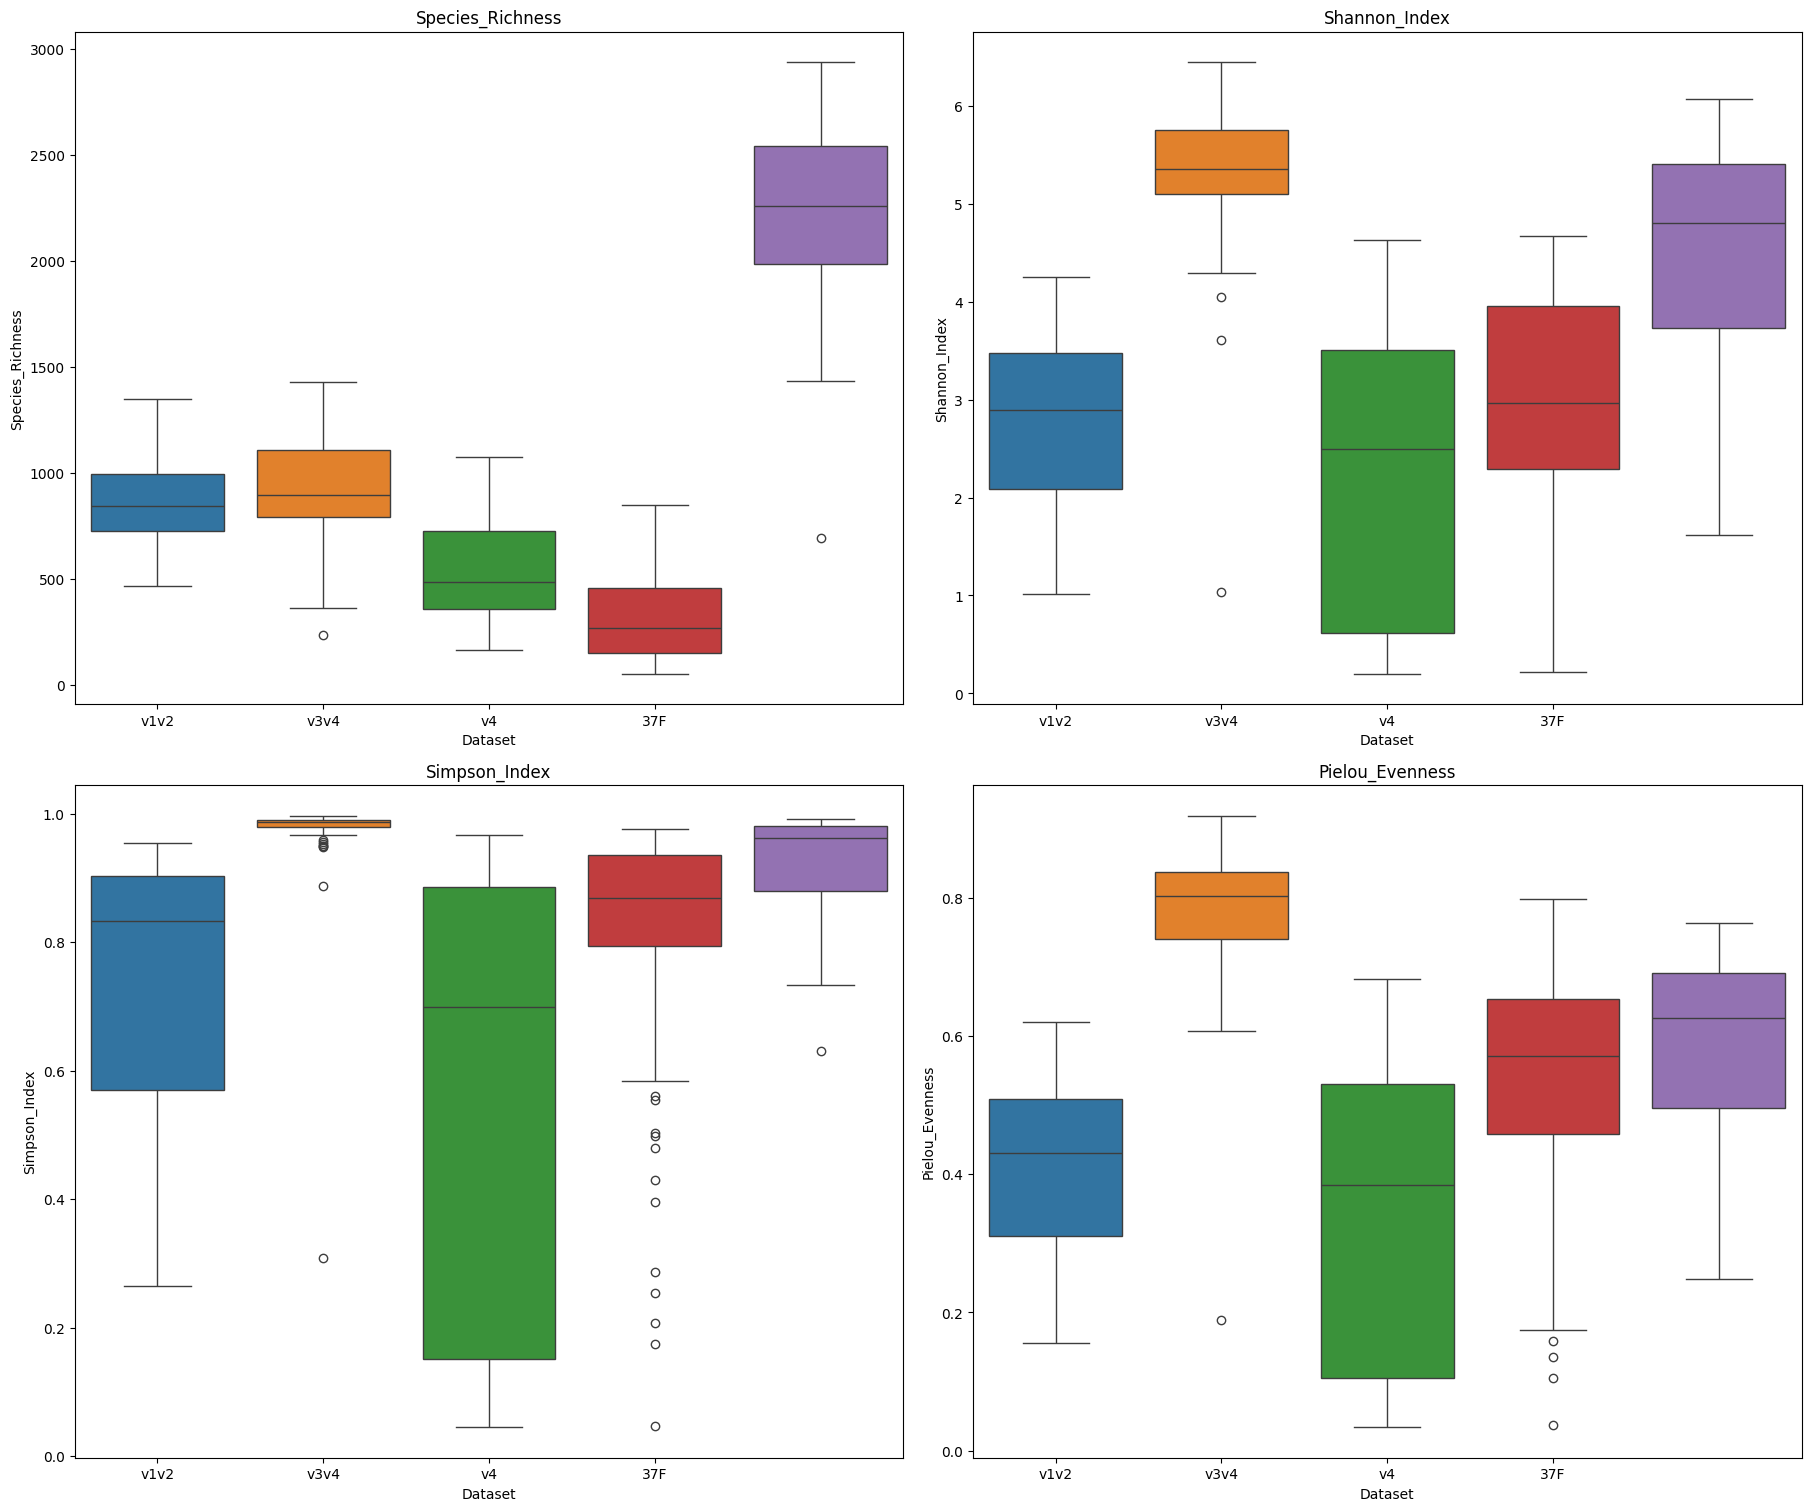

In [10]:
plt.figure(figsize=(18, 15), layout='constrained')

for div, i in zip(['Species_Richness', 'Shannon_Index', 'Simpson_Index', 'Pielou_Evenness'], [221, 222, 223, 224]):
    plt.subplot(i)
    sns.boxplot(data=pd.DataFrame({"V1V2" : v1v2_div[div], 
                               "V3V4" : v3v4_div[div], 
                               "V4" : v4_div[div], 
                               "37F" : f_div[div], 
                               "V9" : v9_div[div]}))

    plt.xlabel('Dataset')
    plt.ylabel(div)
    plt.xticks(ticks=range(4), labels=['v1v2', 'v3v4', 'v4', '37F'])
    plt.title(div)
    
#plt.title('Distribution of Shannon Index Across Datasets')
plt.savefig('../results/div_box.png')
plt.show()

# Mutivariate Analysis

## Metadata Correlation Analysis

In order to calculate correlation between metadata variables, we use no scaled data.

,AMBI,NSI,ISI,NQI1
Distance_cage_gps,4.176316e-26,9.462352e-23,1.912143e-20,1.850807e-22
Depth,2.037654e-10,3.929714e-13,1.258669e-15,2.934318e-10
pH,1.594037e-07,2.253348e-06,3.012385e-04,7.948786e-09


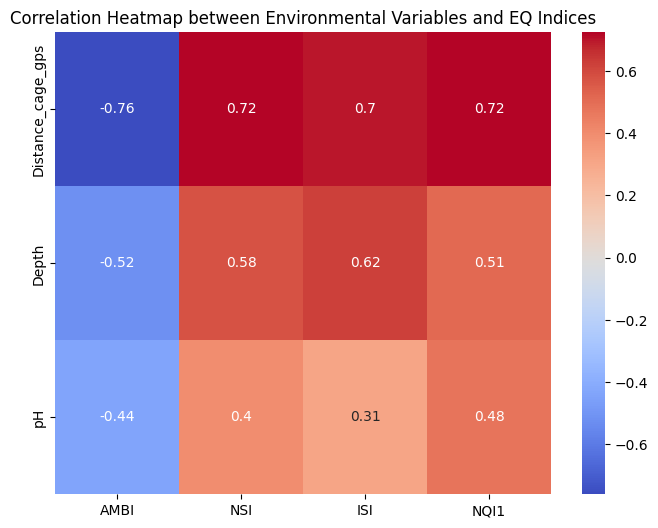

In [11]:
corr_metadata = metadata.iloc[:, -7:]
corr_metadata = corr_metadata.dropna(how='any')

MVA = MultivariatesAnalysis(corr_metadata)
corr_df, pval_df = MVA.correlation_bi_env()
pval_df

## Canonical Correspondance Analysis

Ordination results:
	Method: Canonical Correspondence Analysis (CCA)
	Eigvals: 117
	Proportion explained: 117
	Features: 2680x117
	Samples: 118x117
	Biplot Scores: 3x3
	Sample constraints: 118x117
	Feature IDs: 'OTU0', 'OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5', 'OTU6', 'OTU7', 'OTU8', 'OTU9', ...
	Sample IDs: 'FHF1-St1-Gr1-A', 'FHF1-St1-Gr1-B', 'FHF1-St1-Gr1-C', 'FHF1-St1-Gr2-B', ...


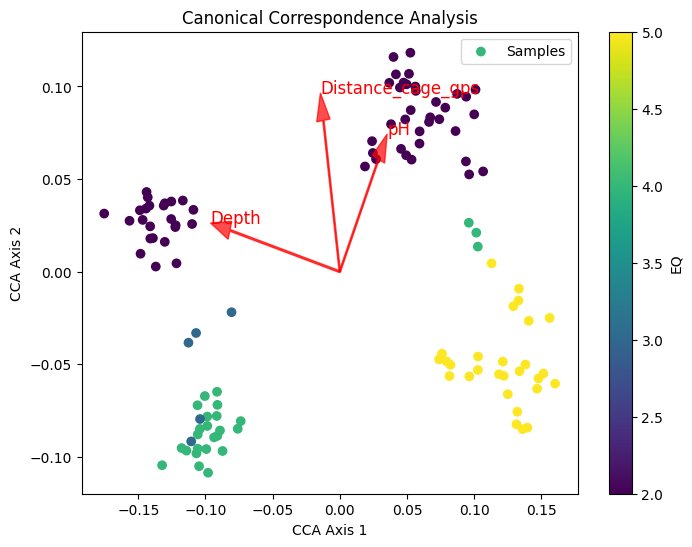

In [12]:
MultivariatesAnalysis(v1v2_metadata_proc, v1v2_otu_data_norm).perform_cca(title="CCA_V1V2")

Ordination results:
	Method: Canonical Correspondence Analysis (CCA)
	Eigvals: 62
	Proportion explained: 62
	Features: 2391x62
	Samples: 63x62
	Biplot Scores: 3x3
	Sample constraints: 63x62
	Feature IDs: 'OTU2', 'OTU6', 'OTU8', 'OTU10', 'OTU14', 'OTU17', 'OTU19', 'OTU20', 'OTU22', ...
	Sample IDs: 'FHF1-St1-Gr1-B', 'FHF1-St2-Gr1-A', 'FHF1-St2-Gr2-A', 'FHF1-St3-Gr1-A', ...


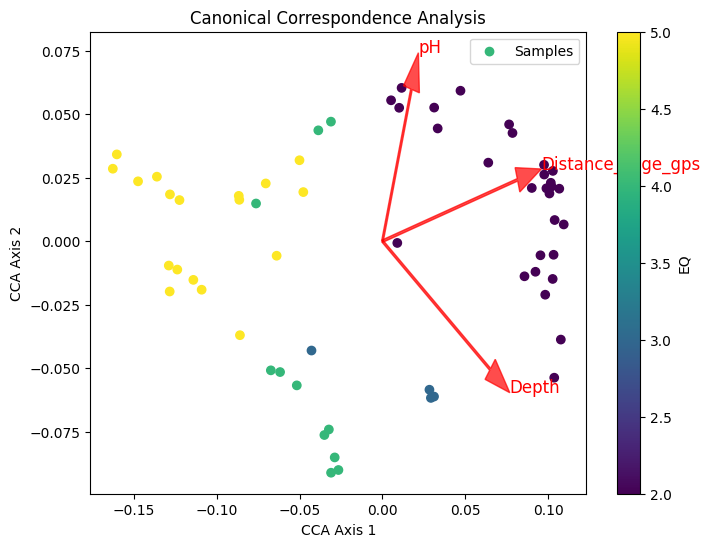

In [13]:
MultivariatesAnalysis(v3v4_metadata_proc, v3v4_otu_data_norm).perform_cca(title="CCA_V3v4")

Ordination results:
	Method: Canonical Correspondence Analysis (CCA)
	Eigvals: 126
	Proportion explained: 126
	Features: 2031x126
	Samples: 126x126
	Biplot Scores: 3x3
	Sample constraints: 126x126
	Feature IDs: 'OTU0', 'OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5', 'OTU6', 'OTU7', 'OTU8', 'OTU9', ...
	Sample IDs: 'FHF1-St1-Gr1-A', 'FHF1-St1-Gr1-B', 'FHF1-St1-Gr1-C', 'FHF1-St1-Gr2-A', ...


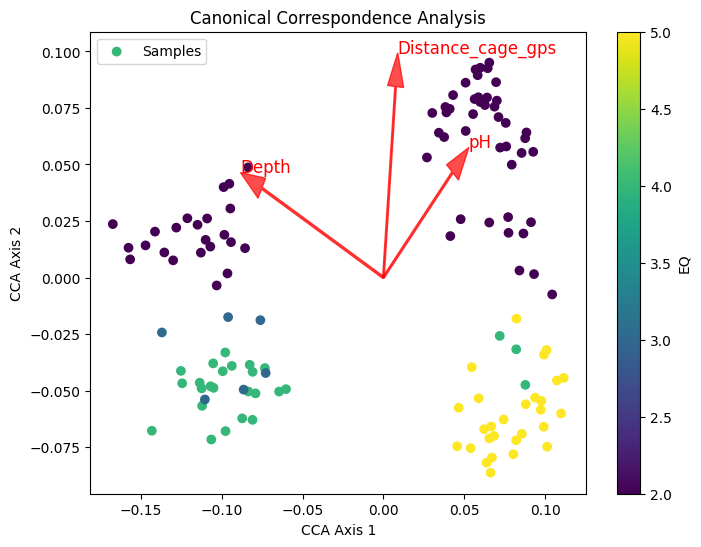

In [14]:
MultivariatesAnalysis(v4_metadata_proc, v4_otu_data_norm).perform_cca(title="CCA_v4")

Ordination results:
	Method: Canonical Correspondence Analysis (CCA)
	Eigvals: 106
	Proportion explained: 106
	Features: 1594x106
	Samples: 107x106
	Biplot Scores: 3x3
	Sample constraints: 107x106
	Feature IDs: 'OTU0', 'OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5', 'OTU6', 'OTU7', 'OTU8', 'OTU9', ...
	Sample IDs: 'FHF1-St1-Gr1-A', 'FHF1-St1-Gr1-C', 'FHF1-St1-Gr2-A', 'FHF1-St2-Gr1-C', ...


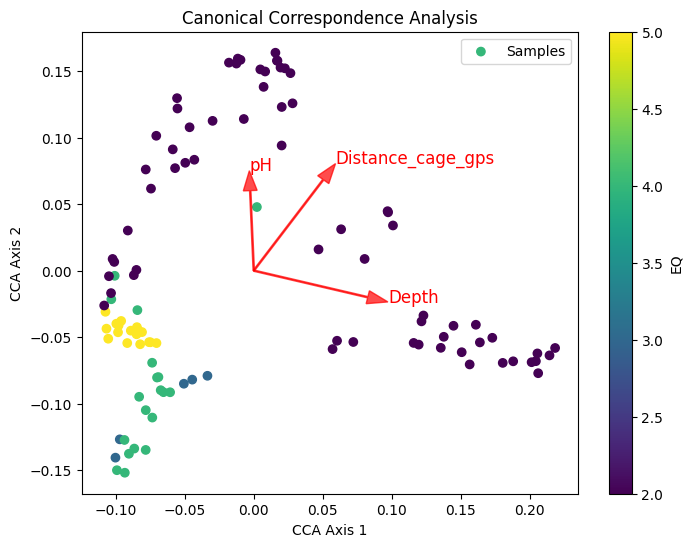

In [15]:
MultivariatesAnalysis(f_metadata_proc, f_otu_data_norm).perform_cca(title="CCA_37F")

Ordination results:
	Method: Canonical Correspondence Analysis (CCA)
	Eigvals: 131
	Proportion explained: 131
	Features: 3588x131
	Samples: 132x131
	Biplot Scores: 3x3
	Sample constraints: 132x131
	Feature IDs: 'OTU0', 'OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5', 'OTU6', 'OTU7', 'OTU8', 'OTU9', ...
	Sample IDs: 'FHF1-St1-Gr1-A', 'FHF1-St1-Gr1-B', 'FHF1-St1-Gr1-C', 'FHF1-St1-Gr2-A', ...


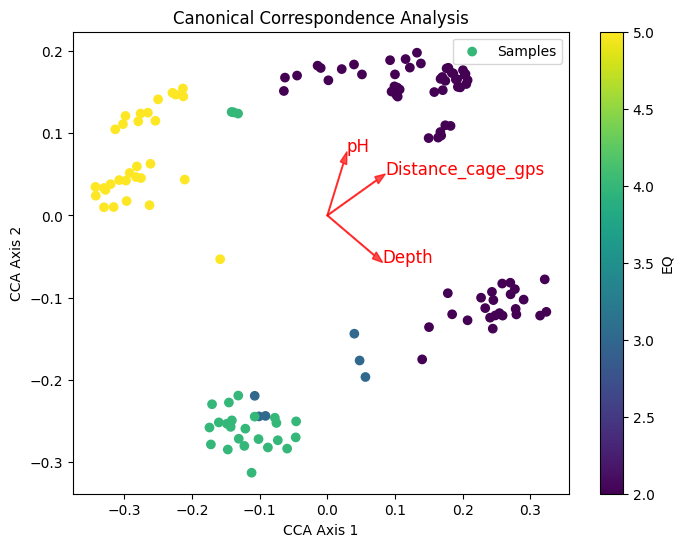

In [16]:
MultivariatesAnalysis(v9_metadata_proc, v9_otu_data_norm).perform_cca(title="CCA_V9")

# Model Training and Explainability

## Prepare Datasets

In [17]:
# Reduce the OTU data 
svd = SVD(n_components=5)

#Dataset with only OTU data
v1v2_otu_reduced = pd.DataFrame(svd.transform(v1v2_otu_data_norm), index=v1v2_env_var.index) 

# Extended Dataset with OTU, environmental data and diversity
v1v2_otu_env = v1v2_otu_reduced.merge(v1v2_env_var, left_index=True, right_index=True) 
v1v2_otu_env_div = v1v2_otu_env.merge(v1v2_div.set_index(v1v2_env_var.index), left_index=True, right_index=True) 
v1v2_div = v1v2_otu_env_div.iloc[:,-4:]
v1v2_otu_env_div.columns = v1v2_otu_env_div.columns.astype(str)
v1v2_otu_env_div

,0,1,2,3,4,Distance_cage_gps,Depth,pH,Species_Richness,Shannon_Index,Simpson_Index,Pielou_Evenness
samples_names,,,,,,,,,,,,
FHF1-St1-Gr1-A,-270.528024,-31.197933,14.703324,-7.525244,5.618995,-1.765817,0.483794,-1.874375,896,1.735867,0.445167,0.255352
FHF1-St1-Gr1-B,-263.389299,-26.436588,14.114789,-10.196544,2.073449,-1.765817,0.483794,-1.874375,758,2.046434,0.528298,0.308631
FHF1-St1-Gr1-C,-257.223842,-25.378416,12.103365,-7.660487,5.169502,-1.765817,0.483794,-1.874375,624,1.787760,0.480295,0.277768
FHF1-St1-Gr2-B,-261.792767,-30.936826,11.156262,-4.336426,6.500395,-1.765817,0.483794,-1.874375,755,2.133904,0.569612,0.322015
FHF1-St1-Gr2-C,-257.323489,-30.783907,10.357170,-2.801753,5.915455,-1.765817,0.483794,-1.874375,695,1.627094,0.435261,0.248642
...,...,...,...,...,...,...,...,...,...,...,...,...
FHF5-St4-Gr1-A,-265.688773,20.254355,-22.592577,-5.144975,3.472011,0.837560,-0.231123,1.359841,753,3.661212,0.922429,0.552714
FHF5-St4-Gr1-B,-264.698901,23.467411,-18.795213,-4.756527,6.435374,0.837560,-0.231123,1.359841,730,2.891574,0.775871,0.438579
FHF5-St4-Gr1-C,-255.331973,20.051717,-17.259753,-3.166845,4.888762,0.837560,-0.231123,1.359841,519,3.327528,0.878130,0.532242


In [18]:
# Reduce the OTU data 
svd = SVD(n_components=5)

# Dataset with only OTU data
v3v4_otu_reduced = pd.DataFrame(svd.transform(v3v4_otu_data_norm), index=v3v4_env_var.index) 

# Extended Dataset with OTU, environmental data and diversity
v3v4_otu_env = v3v4_otu_reduced.merge(v3v4_env_var, left_index=True, right_index=True) 
v3v4_otu_env_div = v3v4_otu_env.merge(v3v4_div.set_index(v3v4_env_var.index), left_index=True, right_index=True) 
v3v4_div = v3v4_otu_env_div.iloc[:, -4:]
v3v4_otu_env_div.columns = v3v4_otu_env_div.columns.astype(str)

In [19]:
# Reduce the OTU data 
svd = SVD(n_components=5)

# Dataset with only OTU data
v4_otu_reduced = pd.DataFrame(svd.transform(v4_otu_data_norm), index=v4_env_var.index) 

# Extended Dataset with OTU, environmental data and diversity
v4_otu_env = v4_otu_reduced.merge(v4_env_var, left_index=True, right_index=True) 
v4_otu_env_div = v4_otu_env.merge(v4_div.set_index(v4_env_var.index), left_index=True, right_index=True) 
v4_div = v4_otu_env_div.iloc[:, -4:]
v4_otu_env_div.columns = v4_otu_env_div.columns.astype(str)

In [20]:
# Reduce the OTU data 
svd = SVD(n_components=5)

# Dataset with only OTU data
f_otu_reduced = pd.DataFrame(svd.transform(f_otu_data_norm), index=f_env_var.index) 

# Extended Dataset with OTU, environmental data and diversity
f_otu_env = f_otu_reduced.merge(f_env_var, left_index=True, right_index=True) 
f_otu_env_div = f_otu_env.merge(f_div.set_index(f_env_var.index), left_index=True, right_index=True) 
f_div = f_otu_env_div.iloc[:, -4:]
f_otu_env_div.columns = f_otu_env_div.columns.astype(str)

In [21]:
# Reduce the OTU data 
svd = SVD(n_components=5)

# Dataset with only OTU data
v9_otu_reduced = pd.DataFrame(svd.transform(v9_otu_data_norm), index=v9_env_var.index) 

# Extended Dataset with OTU, environmental data and diversity
v9_otu_env = v9_otu_reduced.merge(v9_env_var, left_index=True, right_index=True) 
v9_otu_env_div = v9_otu_env.merge(v9_div.set_index(v9_env_var.index), left_index=True, right_index=True) 
v9_div = v9_otu_env_div.iloc[:, -4:]
v9_otu_env_div.columns = v9_otu_env_div.columns.astype(str)

## Results Using OTU + Environmental + Diversity Indices

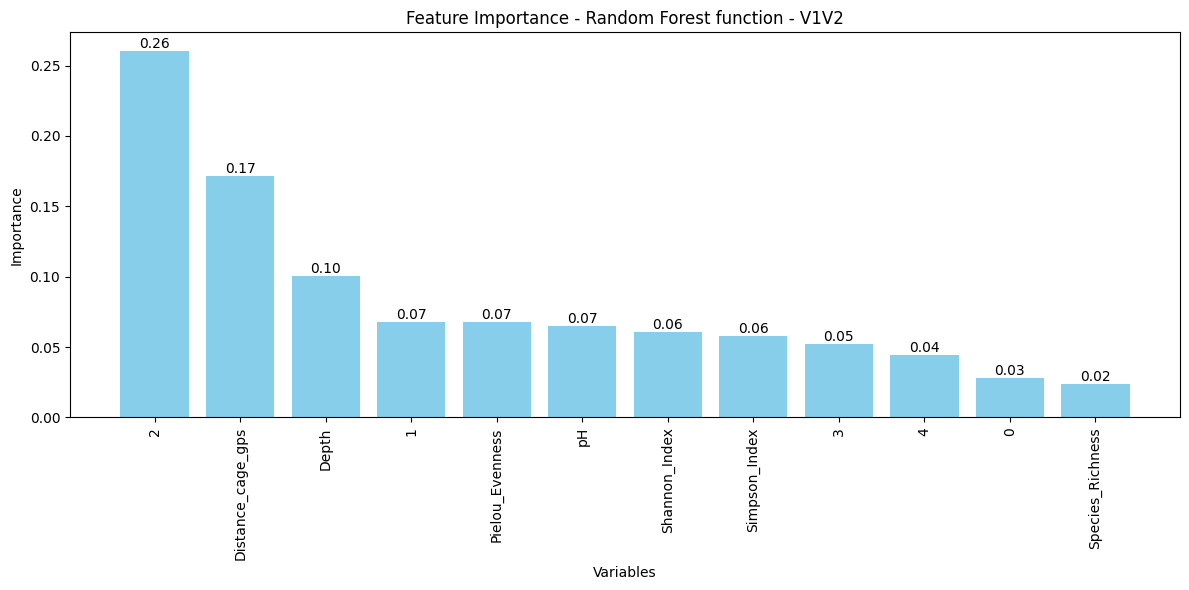

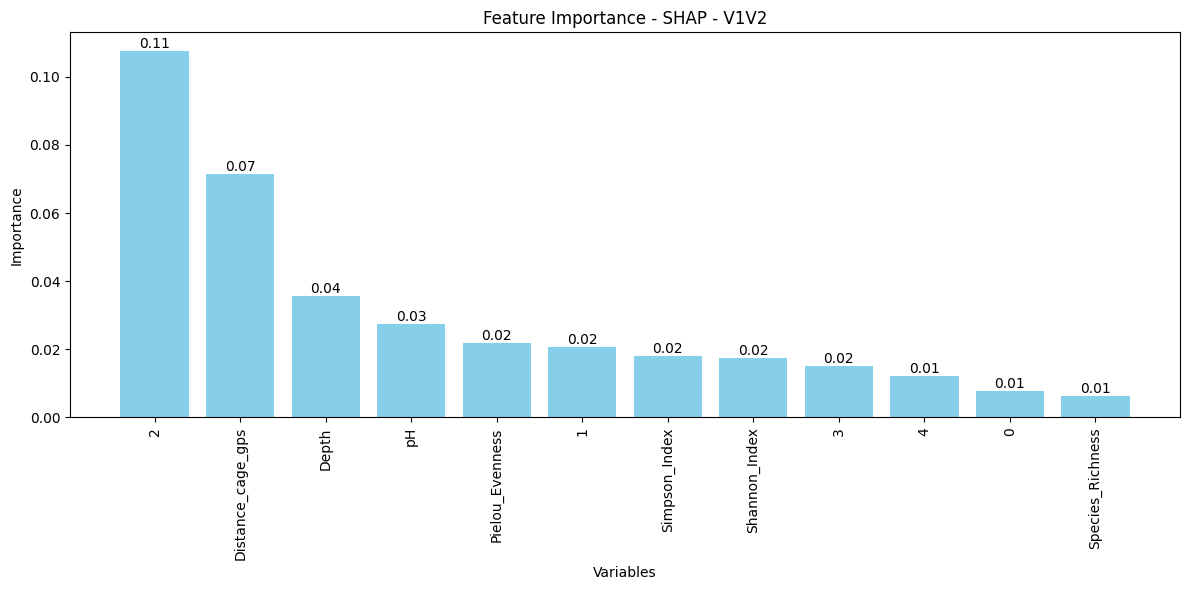

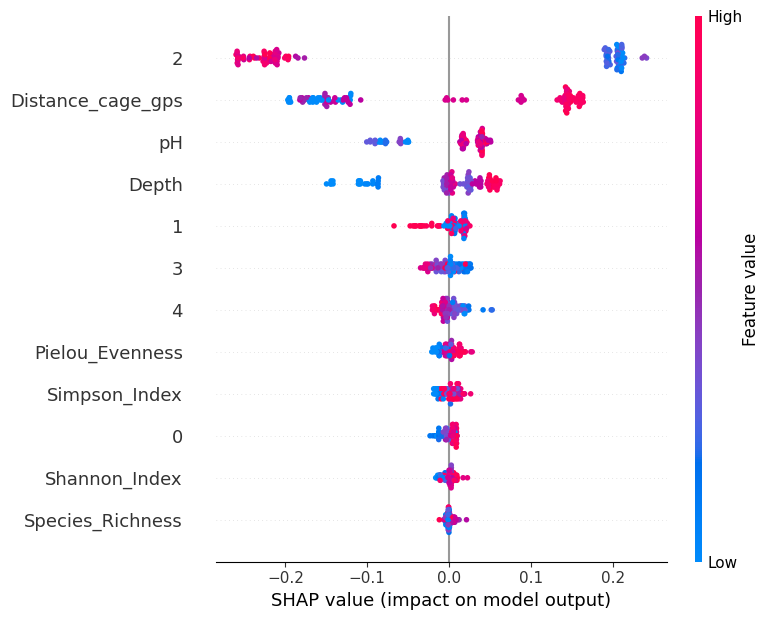

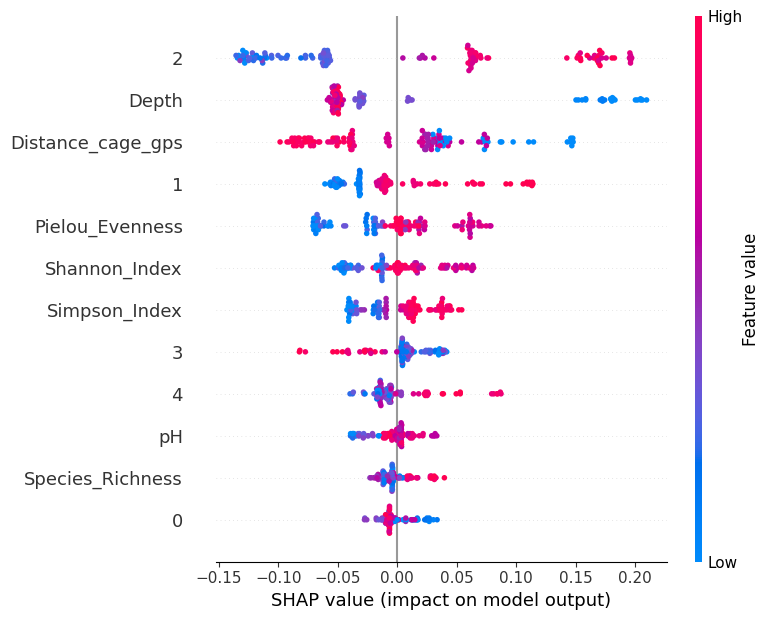

<Figure size 640x480 with 0 Axes>

In [22]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v1v2_otu_env_div, v1v2_metadata_proc["AMBI"], "V1V2")

# Train the model
rf_model, v1v2_ext_performance = model_trainer.train_random_forest()

# Get SHAP feature importance
model_trainer.explain_with_shap(rf_model, v1v2_otu_env_div)

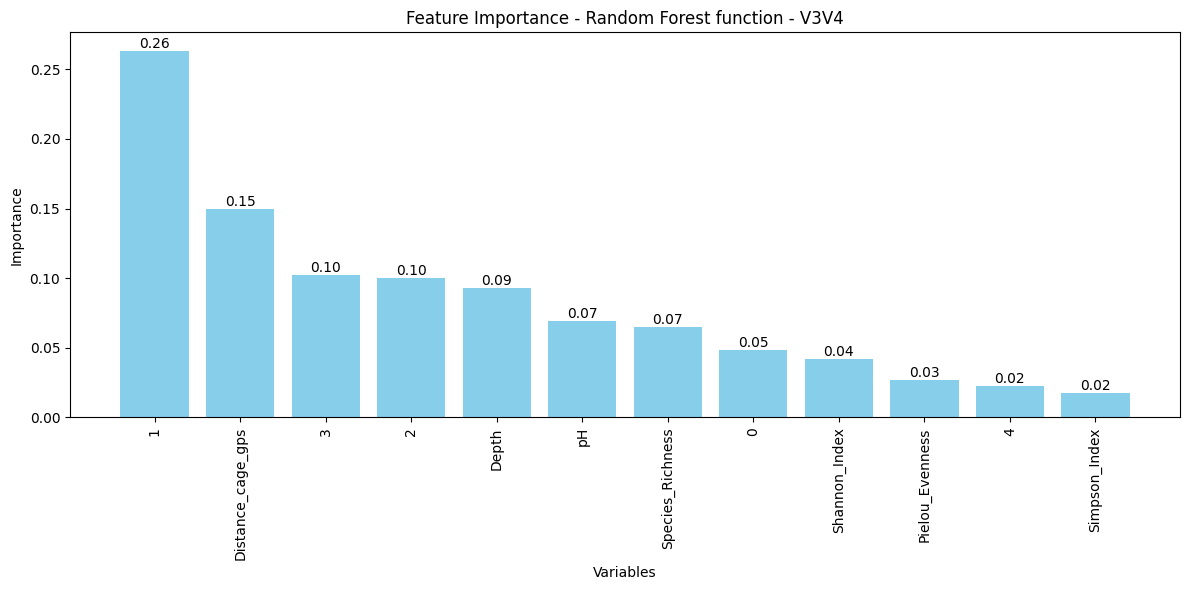

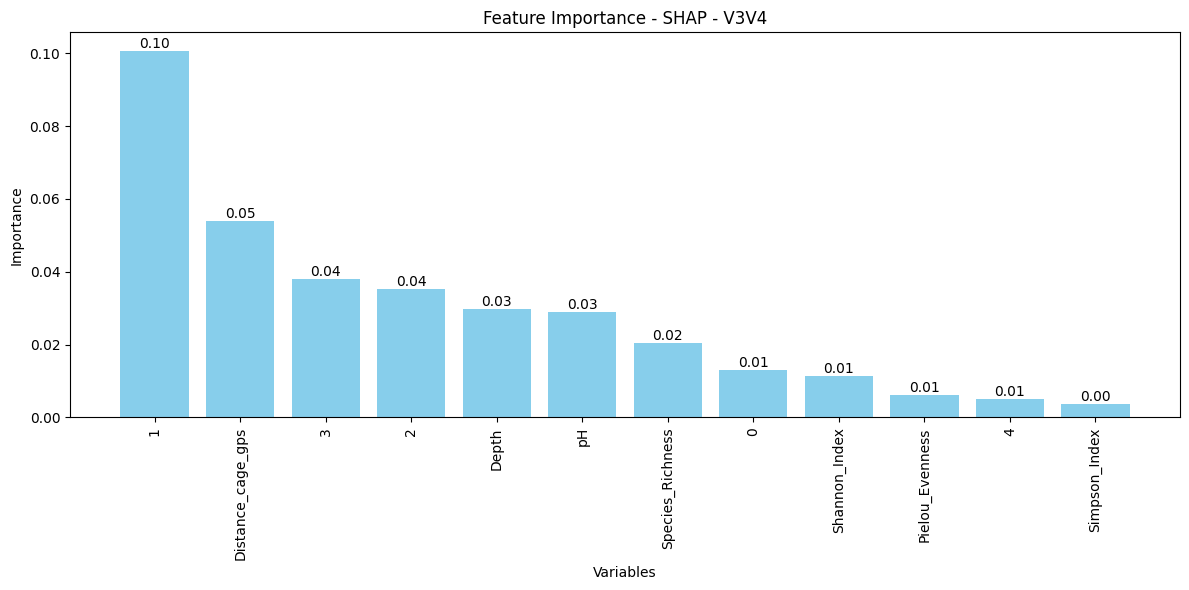

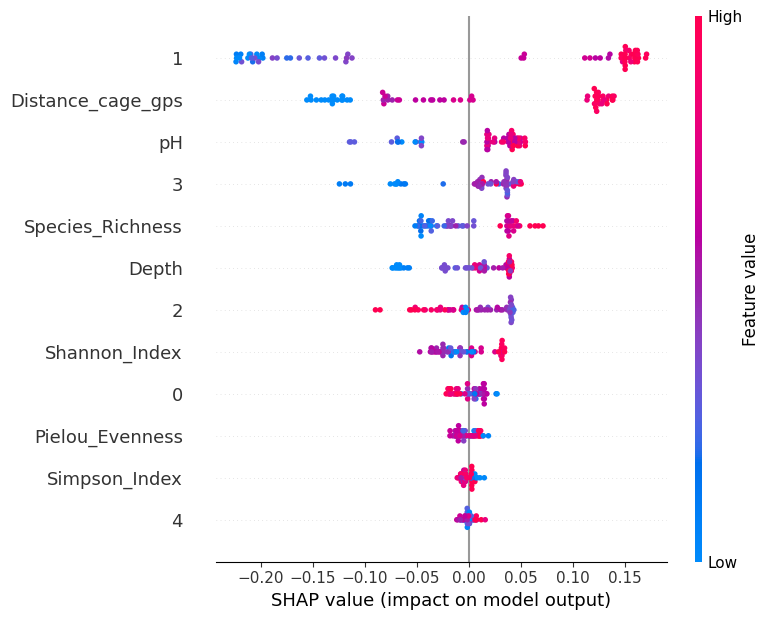

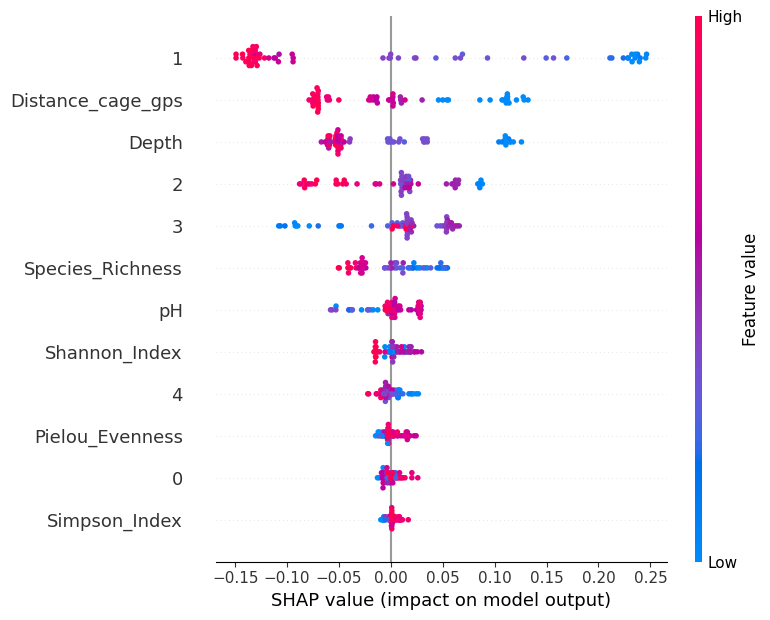

<Figure size 640x480 with 0 Axes>

In [23]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v3v4_otu_env_div, v3v4_metadata_proc["AMBI"], "V3V4")

# Train the model
rf_model, v3v4_ext_performance = model_trainer.train_random_forest()

# Get SHAP feature importance
model_trainer.explain_with_shap(rf_model, v3v4_otu_env_div)

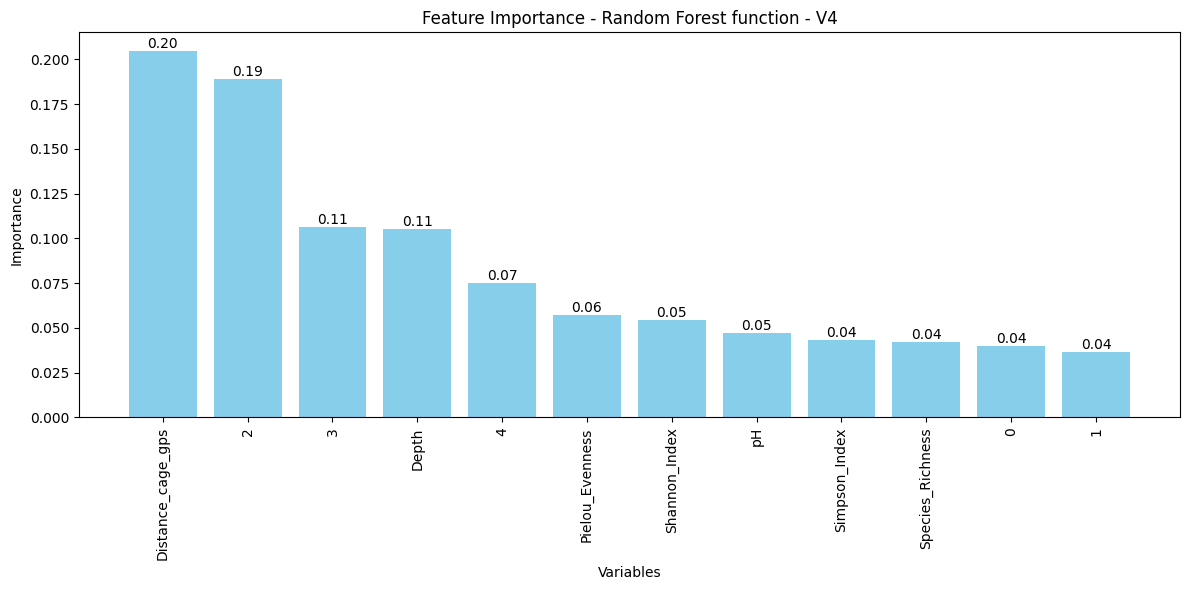

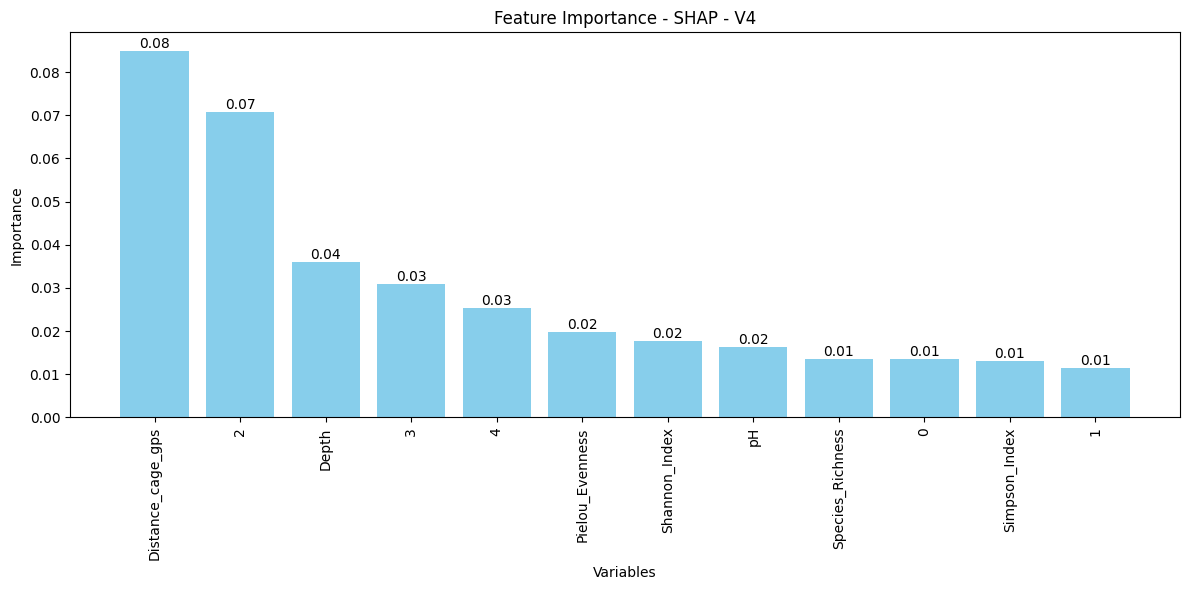

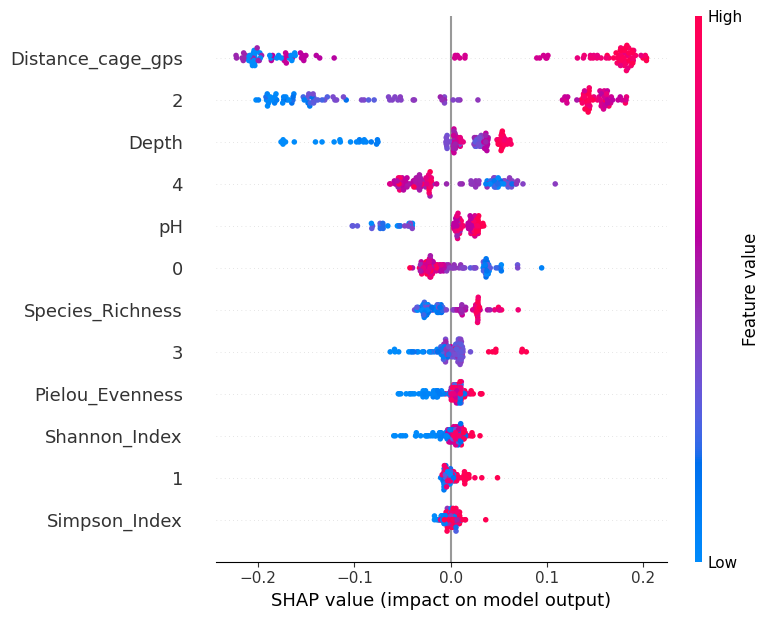

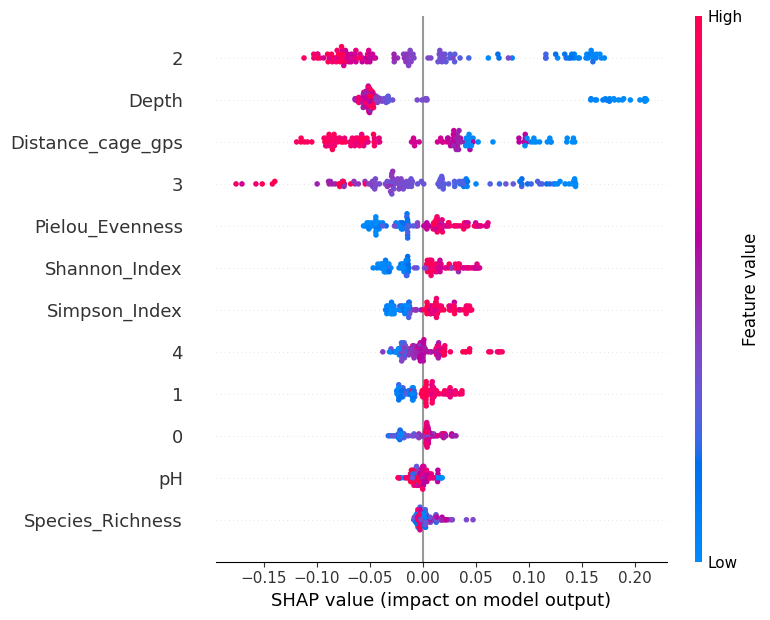

<Figure size 640x480 with 0 Axes>

In [24]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v4_otu_env_div, v4_metadata_proc["AMBI"], "V4")

# Train the model
rf_model, v4_ext_performance = model_trainer.train_random_forest()

# Get SHAP feature importance
model_trainer.explain_with_shap(rf_model, v4_otu_env_div)

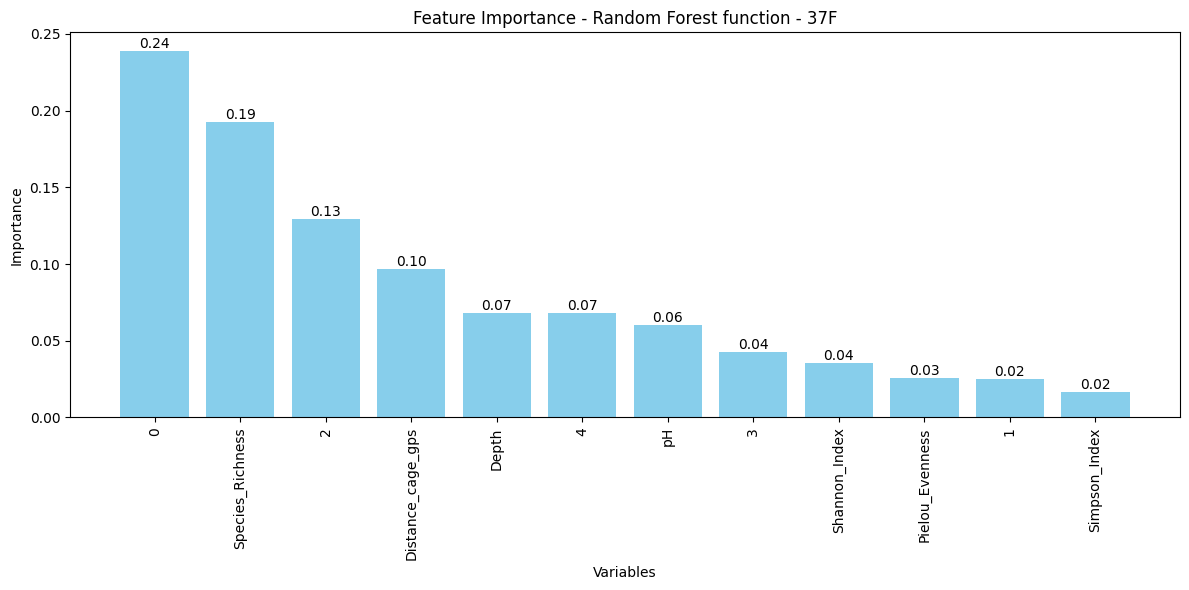

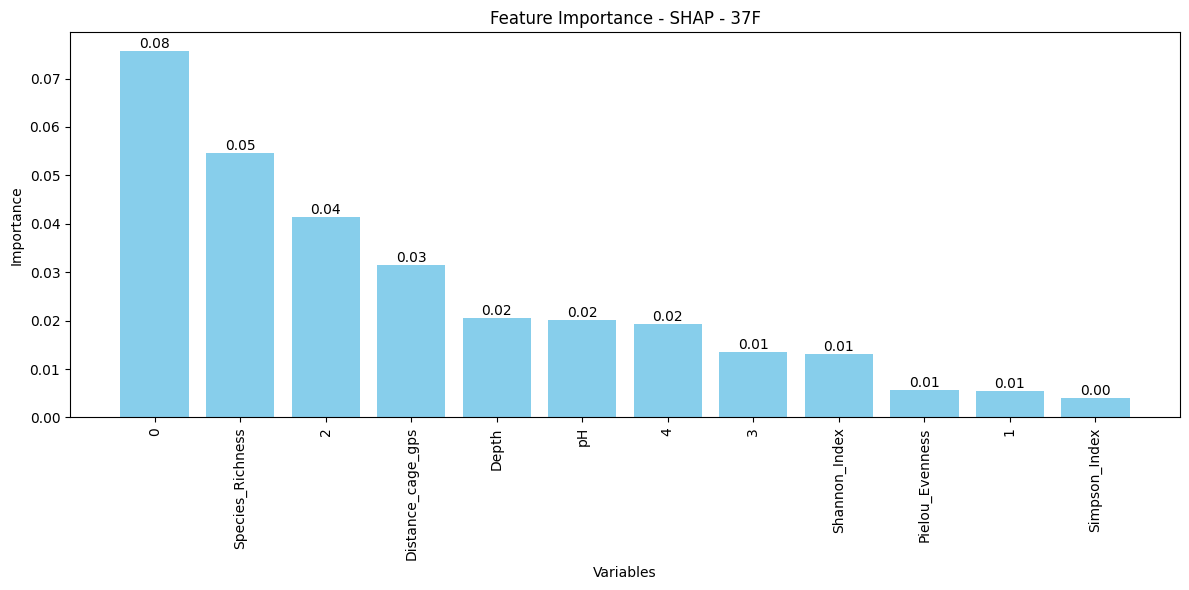

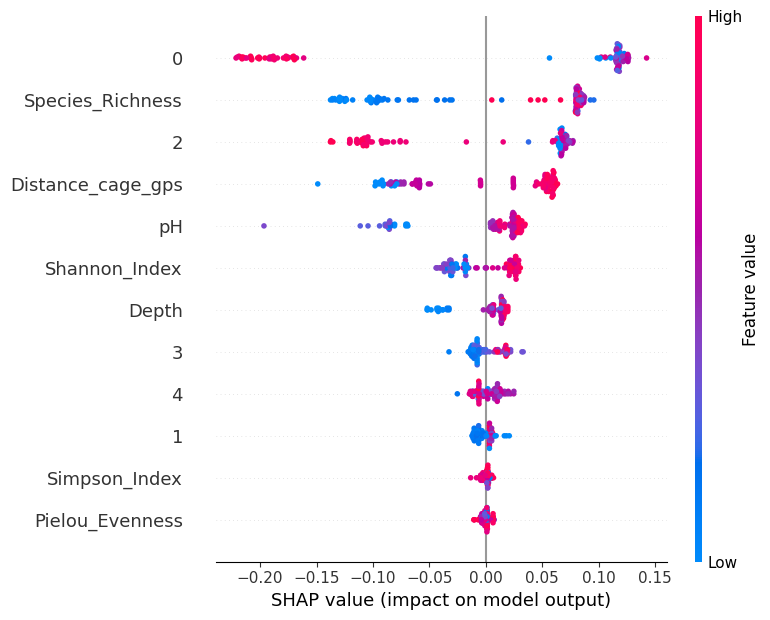

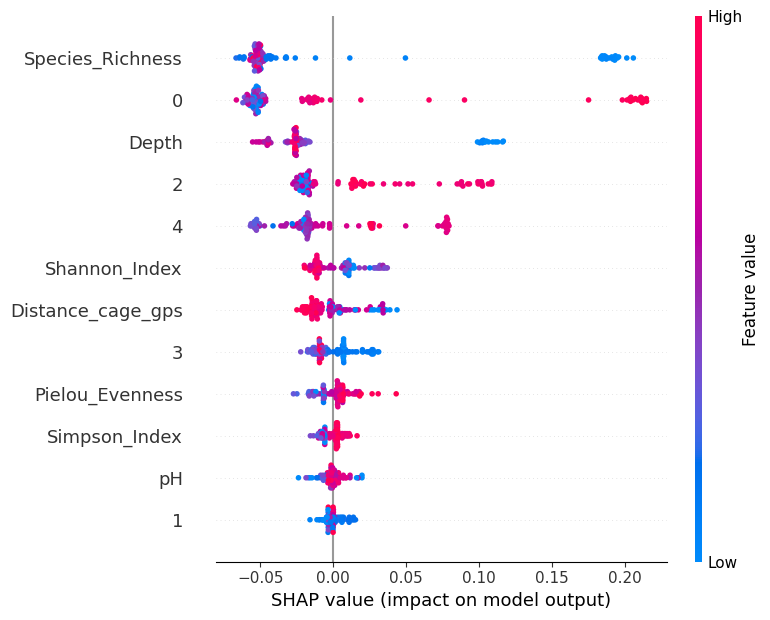

<Figure size 640x480 with 0 Axes>

In [25]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(f_otu_env_div, f_metadata_proc["AMBI"], "37F")

# Train the model
rf_model, f_ext_performance = model_trainer.train_random_forest()

# Get SHAP feature importance
model_trainer.explain_with_shap(rf_model, f_otu_env_div)

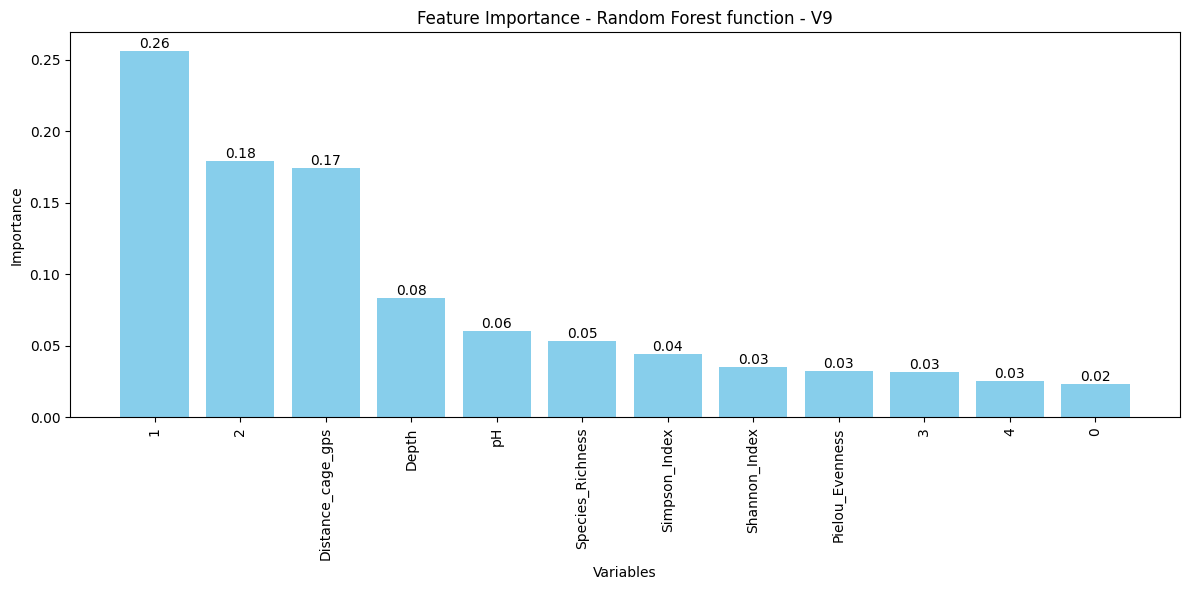

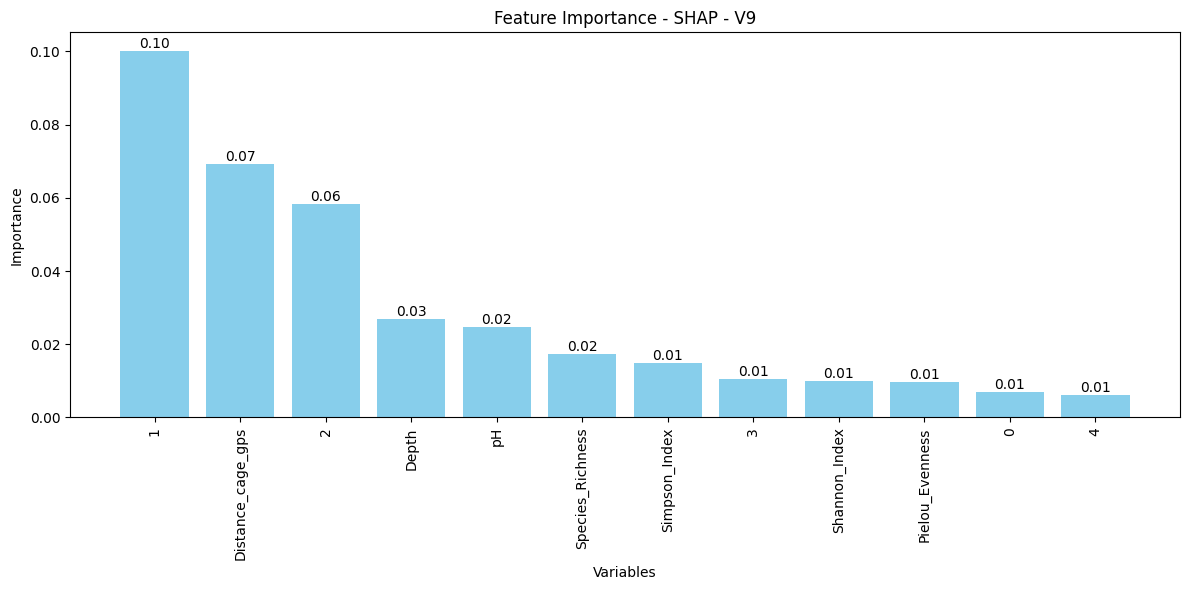

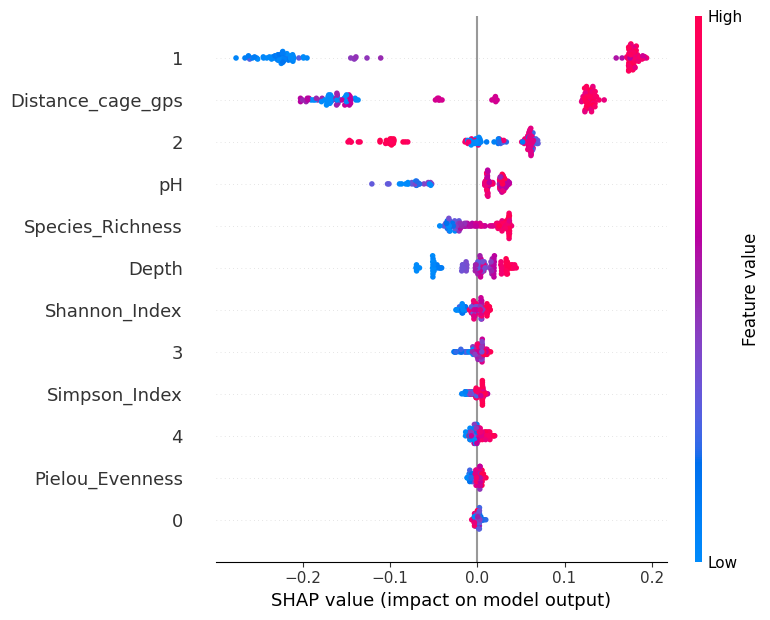

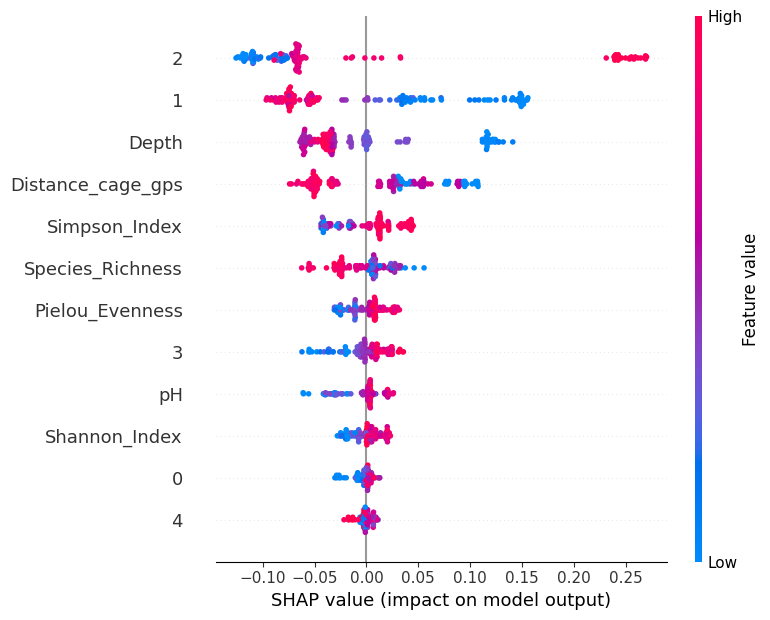

<Figure size 640x480 with 0 Axes>

In [26]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v9_otu_env_div, v9_metadata_proc["AMBI"], "V9")

# Train the model
rf_model, v9_ext_performance = model_trainer.train_random_forest()

# Get SHAP feature importance
model_trainer.explain_with_shap(rf_model, v9_otu_env_div)

In [27]:
extended_data_performance_df = pd.DataFrame({
    'v1v2': v1v2_ext_performance,
    'v3v4': v3v4_ext_performance,
    'v4': v4_ext_performance,
    'f': f_ext_performance,
    'v9': v9_ext_performance
})
extended_data_performance_df.T

,F1 Score,Kappa Score,Recall Score
v1v2,0.919,0.889,"[1.0, 0.0, 0.8888888888888888, 1.0]"
v3v4,0.893,0.863,"[1.0, 0.0, 0.75, 1.0]"
v4,0.936,0.928,"[1.0, 0.0, 1.0, 1.0]"
f,0.915,0.859,"[1.0, 0.5, 0.7142857142857143, 1.0]"
v9,0.898,0.837,"[0.875, 0.5, 1.0, 0.9090909090909091]"


## Results Using Environmental Variables

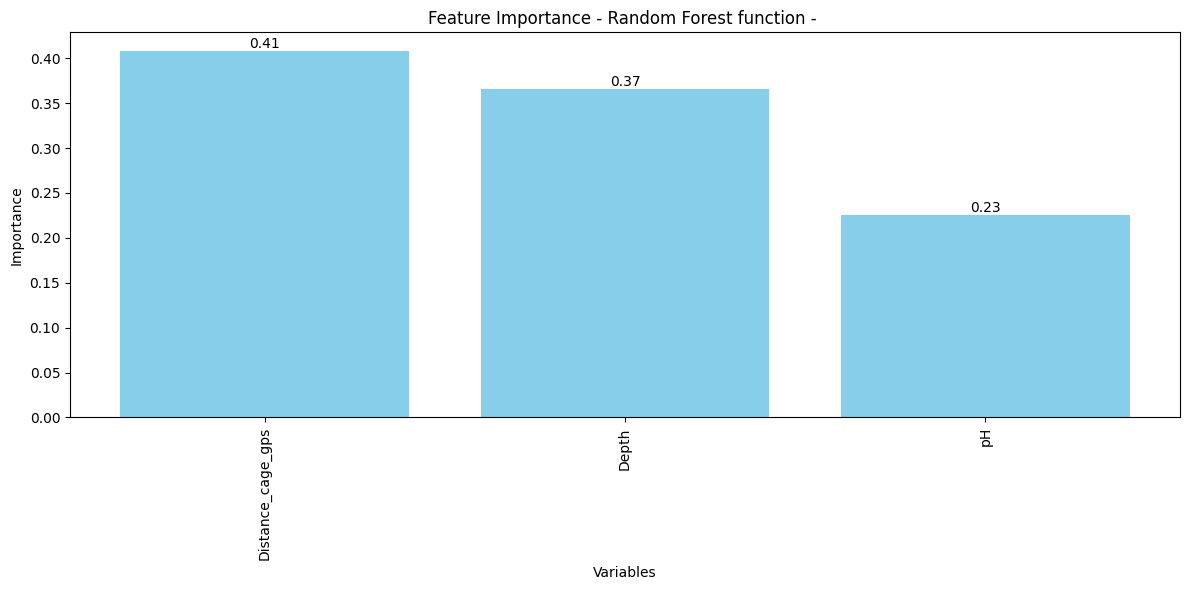

In [28]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v1v2_env_var, v1v2_metadata_proc["AMBI"])

# Train the model
rf_model, v1v2_env_performance = model_trainer.train_random_forest()

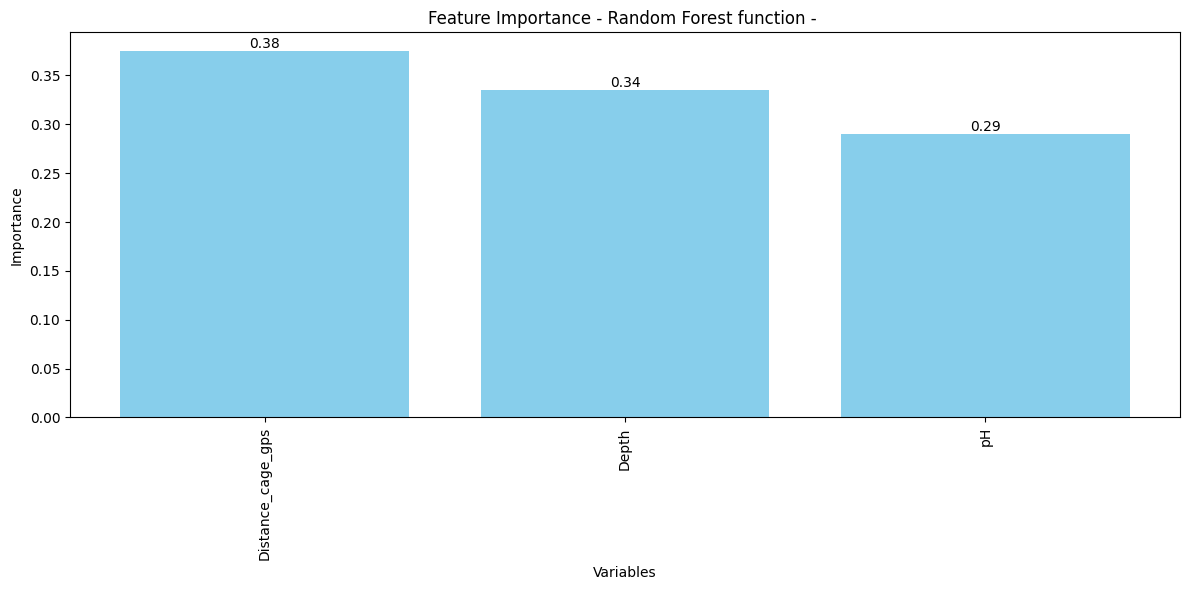

In [30]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v3v4_env_var, v3v4_metadata_proc["AMBI"])

# Train the model
rf_model, v3v4_env_performance = model_trainer.train_random_forest()

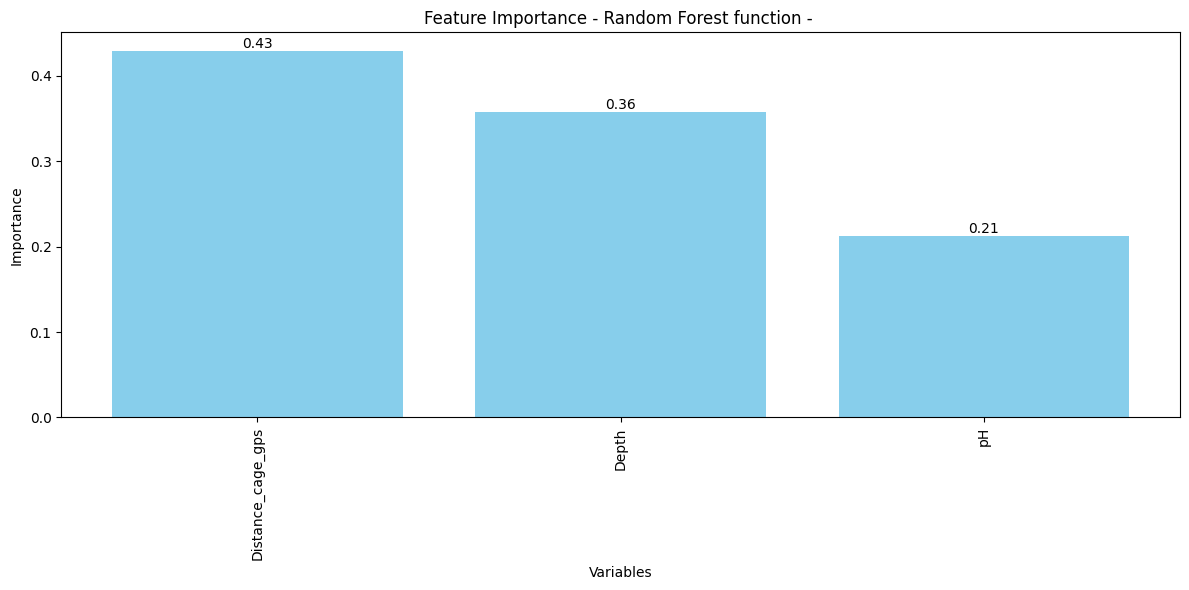

In [31]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v4_env_var, v4_metadata_proc["AMBI"])

# Train the model
rf_model, v4_env_performance = model_trainer.train_random_forest()

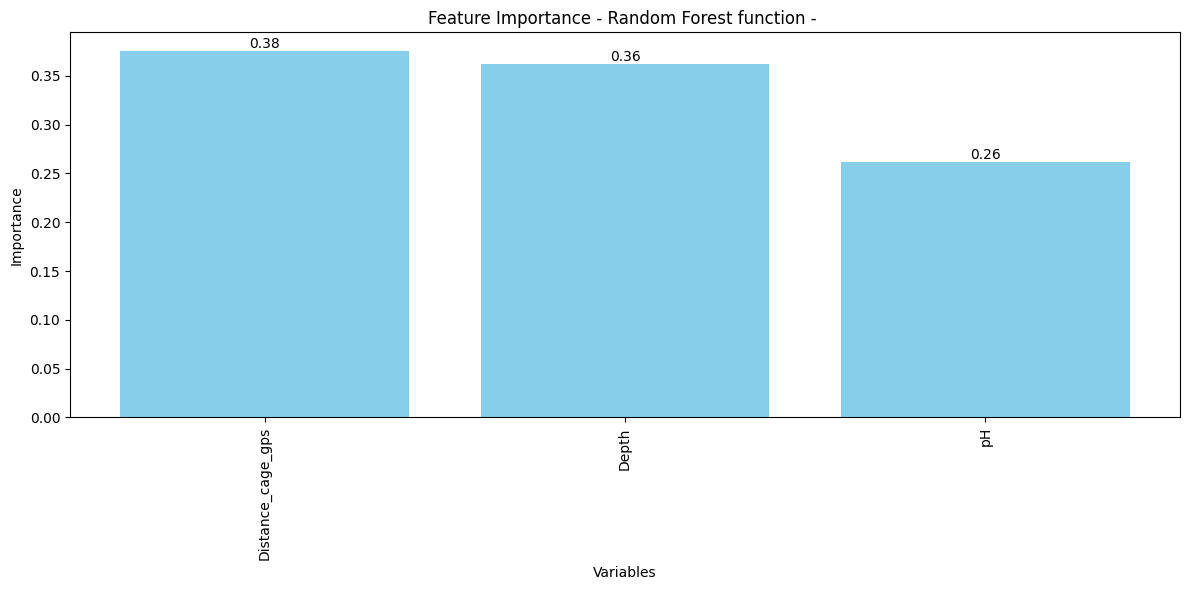

In [32]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(f_env_var, f_metadata_proc["AMBI"])

# Train the model
rf_model, f_env_performance = model_trainer.train_random_forest()

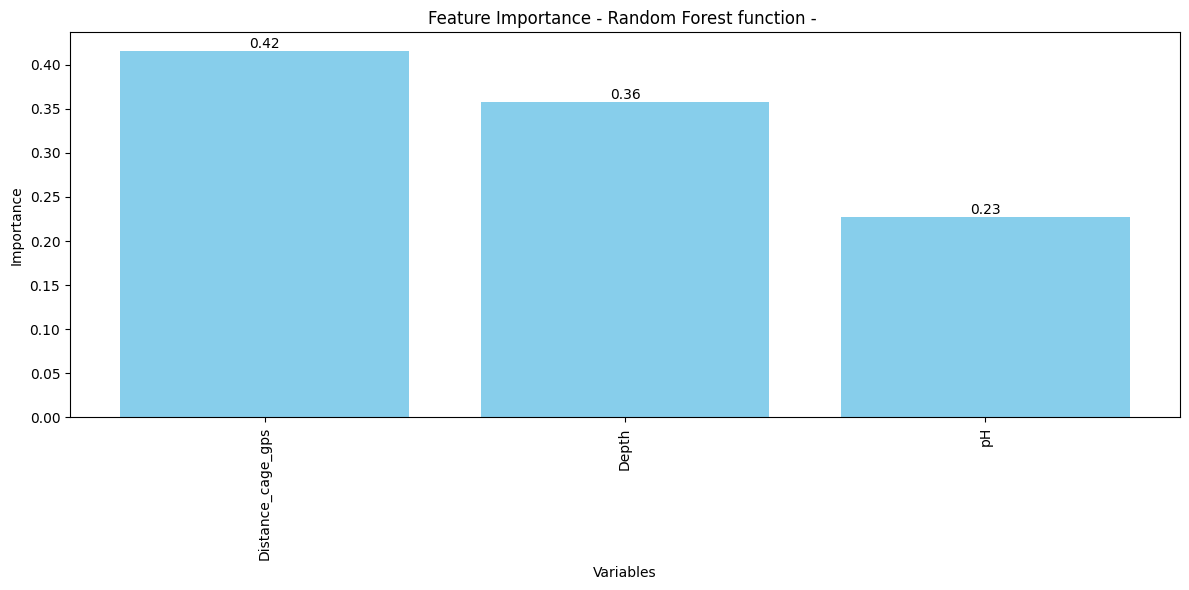

In [33]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v9_env_var, v9_metadata_proc["AMBI"])

# Train the model
rf_model, v9_env_performance = model_trainer.train_random_forest()

In [34]:
extended_data_performance_df = pd.DataFrame({
    'v1v2': v1v2_env_performance,
    'v3v4': v3v4_env_performance,
    'v4': v4_env_performance,
    'f': f_env_performance,
    'v9': v9_env_performance
})
extended_data_performance_df.T

,F1 Score,Kappa Score,Recall Score
v1v2,0.91,0.889,"[0.9523809523809523, 0.0, 1.0, 1.0]"
v3v4,0.795,0.713,"[1.0, 0.0, 0.25, 1.0]"
v4,0.916,0.893,"[0.9583333333333334, 0.0, 1.0, 1.0]"
f,0.891,0.816,"[1.0, 1.0, 0.42857142857142855, 1.0]"
v9,0.881,0.836,"[0.875, 0.0, 1.0, 1.0]"


## Results Using Diversity

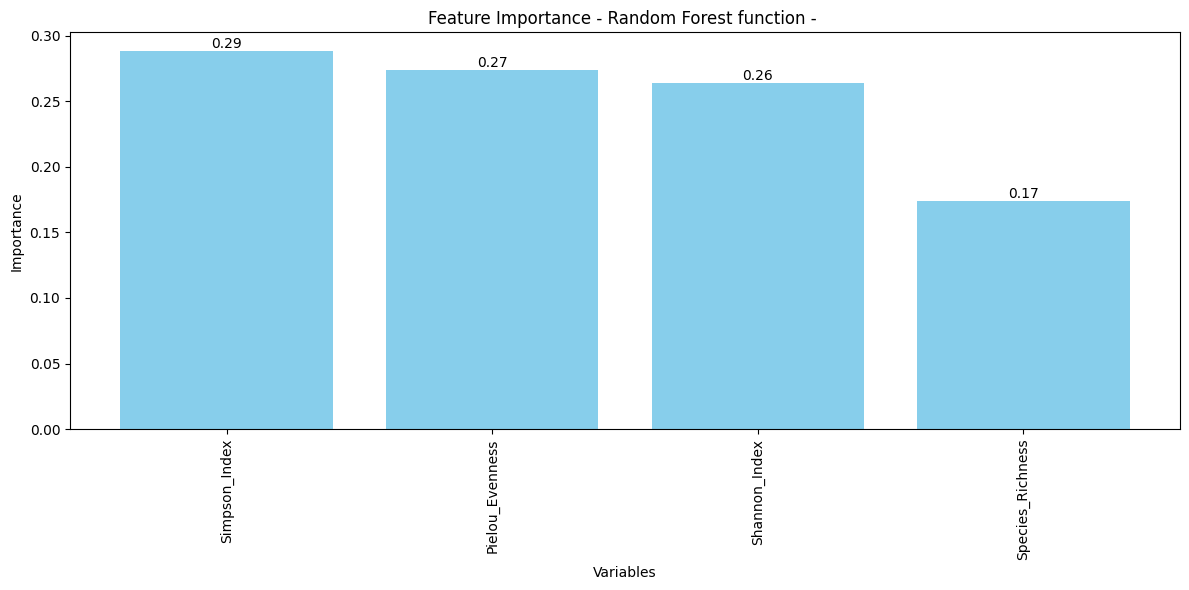

In [35]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v1v2_div, v1v2_metadata_proc["AMBI"])

# Train the model
rf_model, v1v2_div_performance = model_trainer.train_random_forest()

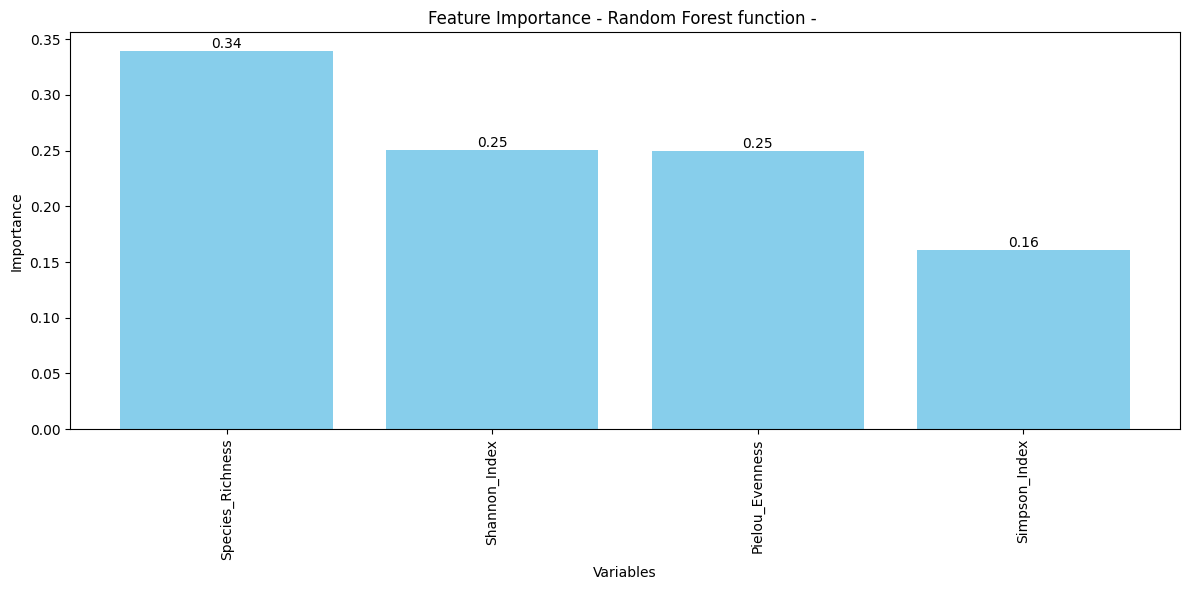

In [36]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v3v4_div, v3v4_metadata_proc["AMBI"])

# Train the model
rf_model, v3v4_div_performance = model_trainer.train_random_forest()

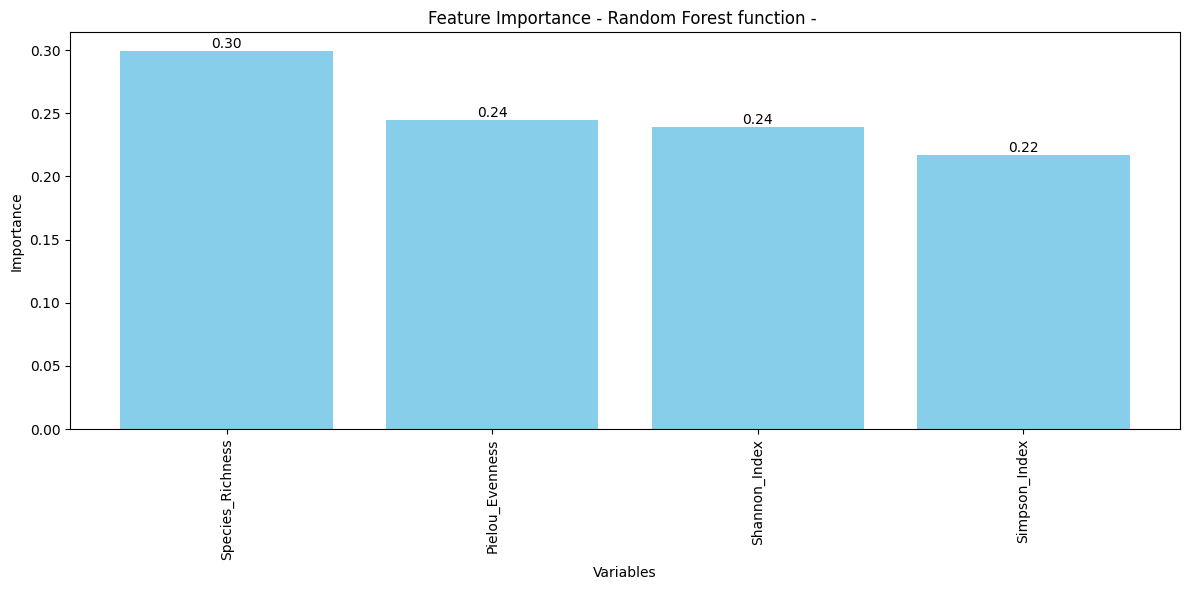

In [37]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v4_div, v4_metadata_proc["AMBI"])

# Train the model
rf_model, v4_div_performance = model_trainer.train_random_forest()

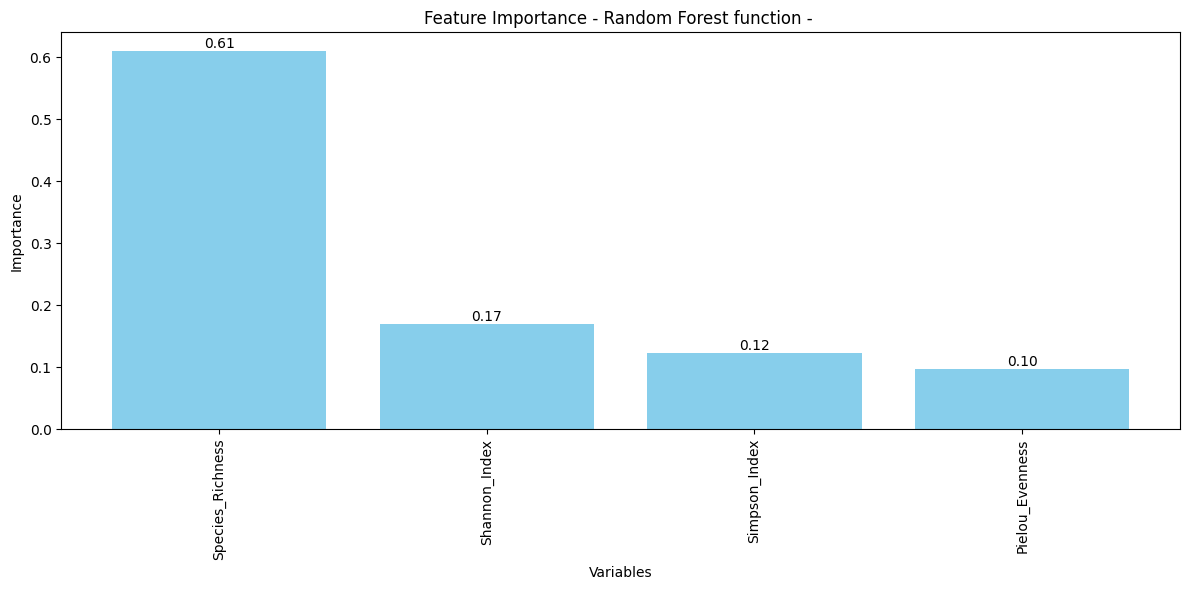

In [38]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(f_div, f_metadata_proc["AMBI"])

# Train the model
rf_model, f_div_performance = model_trainer.train_random_forest()

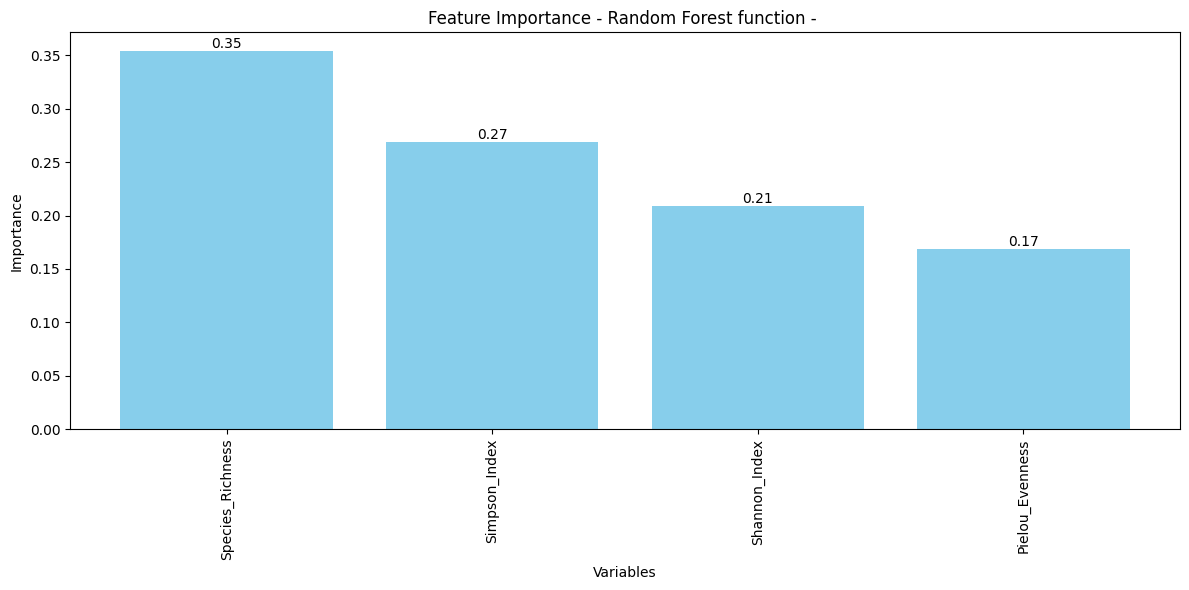

In [39]:
# Create an instance of ModelTrainer
model_trainer = ModelTrainer(v9_div, v9_metadata_proc["AMBI"])

# Train the model
rf_model, v9_div_performance = model_trainer.train_random_forest()

In [40]:
extended_data_performance_df = pd.DataFrame({
    'v1v2': v1v2_div_performance,
    'v3v4': v3v4_div_performance,
    'v4': v4_div_performance,
    'f': f_div_performance,
    'v9': v9_div_performance
})
extended_data_performance_df.T

,F1 Score,Kappa Score,Recall Score
v1v2,0.612,0.389,"[0.7619047619047619, 0.0, 0.5555555555555556, ..."
v3v4,0.675,0.514,"[1.0, 0.0, 0.25, 0.5714285714285714]"
v4,0.717,0.552,"[0.8333333333333334, 0.0, 0.5555555555555556, ..."
f,0.871,0.771,"[1.0, 0.5, 0.5714285714285714, 0.8333333333333..."
v9,0.662,0.468,"[0.875, 0.0, 0.5, 0.5454545454545454]"
